# Introduction to TensorFlow

Welcome to TensorFlow! In this introduction we will go through the basics of TensorFlow so that we can understand how the package works. We won't being going over neural networks in this tutorial, but throughout the tutorial, you can see how we are heading towards the direction of building neural networks.

## Tensorflow Installation

Follow https://www.tensorflow.org/install/ for installing tensorflow, and make sure you have Python installed.

In [1]:
import tensorflow as tf

## What is a Tensor

A "tensor" is a representation of data in tensorflow as an n-dimensional matrix. 

- a tensor of rank 0 is: 5
- a tensor of rank 1 is: [5,6,7] (shape [3])
- a tensor of rank 2 is: [[1,2,3], [2,3,4]] (shape [2,3])
- and so on so forth...

Once we import tensorflow we can define constants. tensorflow also supports type inference.

In [2]:
num1 = tf.constant(5.0, tf.float32)
num2 = tf.constant(7.0)
print(num1, num2)

Tensor("Const:0", shape=(), dtype=float32) Tensor("Const_1:0", shape=(), dtype=float32)


## TensorFlow Sessions

The nodes we created can't actually be used until we start a session (their values aren't evaluated until we are in a session). 

In [3]:
sess = tf.Session()
print(sess.run([num1, num2]))

[5.0, 7.0]


We can also create nodes which perform operations like addition, and apply them to other nodes.

In [4]:
op1 = tf.add(num1, num2)
print(sess.run(op1)) 
# alternatively we could also do sess.run(num1 + num2), but this
# shows the overall structure of how Tensorflow works.

12.0


## Placeholders
Placeholders in tensorflow can be thought of nodes which are waiting to receive a value.

Notice up until now that our nodes represent a structure of computation. It is not until we run a session that we feed data into our nodes and we retrieve an output - you can think of this as lazy evaluation

In [5]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
sum_x_y = x + y # tf.add is overloaded with the + operator

With sum_x_y, we can pass it any kind of data for x and y, and it will be able to add our values up (as long as the shapes are the same)

In [6]:
print(sess.run(sum_x_y, {x: 5, y: 7}))

12.0


In [7]:
print(sess.run(sum_x_y, {x: [5, 7], y: [2, 4]}))

[  7.  11.]


As you can see, we can also create operations upon other operations

In [8]:
sum_times_2 = sum_x_y * 2

print(sess.run(sum_times_2, {x: [5, 7], y: [2, 4]}))

[ 14.  22.]


## Outputting Graph to TensorBoard
We can write our session graph to a file using FileWriter. Then we can view the graph via tensorboard

In [9]:
one = tf.constant(5, name='node_1')
two = tf.constant(2, name='node_2')
three = tf.multiply(one, two, name='node_3')
sess1 = tf.Session()
output = sess1.run(three)
writer = tf.summary.FileWriter('./my_graph', sess1.graph)
writer.close()
sess1.close()

## Building a Linear Model
Variables in tensorflow have a value, and this value is mutable. Variables are especially useful while training our models so that they can be adjusted for better performance

In [10]:
weights = tf.Variable([.5])
bias = tf.Variable([-.5])
x = tf.placeholder(tf.float32)

linear_model = weights * x + bias

Variables have to be initialized. To do so we use tf.global_variables_initializer, and pass that to our session

In [11]:
init = tf.global_variables_initializer()
sess.run(init)
print(sess.run(linear_model, {x: [0,1,2,3]}))

[-0.5  0.   0.5  1. ]


As we can see, when we run our session each input is ran through the linear model we build. If we want to see the squared error of our model, we can build more tensors as the following:

In [12]:
y = tf.placeholder(tf.float32)
squared_errors = tf.square(linear_model - y)
total_error = tf.reduce_sum(squared_errors)
print(sess.run(total_error, {x: [0, 1, 2, 3], y: [2.5, 3, 3.5, 4]}))

36.0


## Training a Linear Model
Recall that in order for our model to learn, we must define a loss function. This way, we can perform gradient descent and adjust the properties of our model so that it can minimize loss. Below, we have constructed a new Tensor which performs gradient descent, and we provide it with the learning rate and which tensor to minimize.

In [13]:
gradient_descent = tf.train.GradientDescentOptimizer(0.01)
train_model = gradient_descent.minimize(total_error)

Now that we've constructed our gradient descent tensor, we will do sess.run(init), to reinitialize our weight and bias to .5 and -.5 respectively. Then we will run gradient descent 800 times and then view the new error, weight, and bias. Ideally, this would produce a model with the slope = 0.5, intercept = 2.5, and error = 0

In [14]:
sess.run(init)

for i in range(800):
    sess.run(train_model, {x: [0, 1, 2, 3],
                     y: [2.5, 3, 3.5, 4]})
    if i % 100 == 0:
        print('iteration: ', i, 'Error: ', sess.run(total_error, {x: [0, 1, 2, 3], y: [2.5, 3, 3.5, 4]}))
print('Error: ', sess.run(total_error, {x: [0, 1, 2, 3], y: [2.5, 3, 3.5, 4]}))
print('Weight: ', sess.run(weights), 'Bias: ', sess.run(bias))

iteration:  0 Error:  20.3616
iteration:  100 Error:  0.0677404
iteration:  200 Error:  0.000548328
iteration:  300 Error:  4.43594e-06
iteration:  400 Error:  3.59472e-08
iteration:  500 Error:  2.96495e-10
iteration:  600 Error:  2.63753e-11
iteration:  700 Error:  2.63753e-11
Error:  2.63753e-11
Weight:  [ 0.50000191] Bias:  [ 2.49999571]


## Quick Recap of Tensors:

- You can think of a tensor as a representation of a multidimensional array or vector
  - tf.constant: A tensor which has a constant value. That value is whatever you define it to be
  - tf.placeholder: A tensor which dosen't have a value until you run a session and provide that tensor with data.
  - tf.Variable: A tensor which has an initial value, but that value can change as we optimize different functions (think of it as a constant which can change)
  - Tensors can also be operations or optimizers like matrix multiplication or gradient descent.
- Remember that tensors are different from vectors or arrays in python. You will always "load" your python vector or array into tensorflow by using a placeholder tensor.

## Activity 1:

Try outputting the graph for training a linear model and see how it works

## Activity 2:

Using the code below, build a linear regression model using tensorflow. The dataset we will be using is the boston housing dataset. This dataset has features for a home, and the label is a home's median value in $1000s. To read more about this dataset, visit https://www.kaggle.com/c/boston-housing. The code block below loads the dataset and performs all the preprocessing required. From here, use the training sets to train a linear model, then print the MSE of your model using the testing set. Keep in mind that the shape of this dataset is multidimensional, so you will need to account for that while building your tensors.

In [15]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.contrib import learn
from sklearn import preprocessing
from sklearn import metrics

boston = learn.datasets.load_dataset('boston')
x, y = boston.data, boston.target
y.resize( y.size, 1 ) #make y = [[x], [x], [x], ... ]

rnd_indices = np.random.rand(len(x)) < 0.80

train_x = x[rnd_indices]
train_y = y[rnd_indices]
test_x = x[~rnd_indices]
test_y = y[~rnd_indices]

scaler = preprocessing.StandardScaler( )
train_x = scaler.fit_transform( train_x )
test_x = scaler.fit_transform( test_x )

n_dim = train_x.shape[1]

### Potential Solution:
Here we are predefining our learning rate and # of training iterations. We will also keep an array to hold our model's cost while training so that we can visualize it later. Now since we are dealing with multidimensional data, we need to define our X placeholder and weights in terms of the number of features we have. From here, our linear model will perform a matrix multiplication of teh weights and inputs, and then add the bias.

In [16]:
learning_rate = 0.01
training_epochs = 1000
cost_history = []

X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,1])
W = tf.Variable(tf.ones([n_dim,1]))
bias = tf.Variable([0.5])

linear_model = tf.matmul(X, W) + bias

init = tf.global_variables_initializer()

This code builds a tensor to compute the cost of our model and builds a tensor to perform gradient descent.

In [17]:
cost = tf.reduce_mean(tf.square(linear_model - Y))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Finally, this code will actually train our weights and bias for us, and every 10 training iterations we will be appending our model's cost to our cost history array

In [18]:
sess = tf.Session()
sess.run(init)

for epoch in range(0, training_epochs):
    sess.run(training_step,feed_dict={X:train_x,Y:train_y})
    if epoch > 0 and epoch % 10 == 0:
        cost_history.append(sess.run(cost,feed_dict={X: train_x,Y: train_y}))

Now we will visualize our cost history array in order to see how quickly the model's error goes down

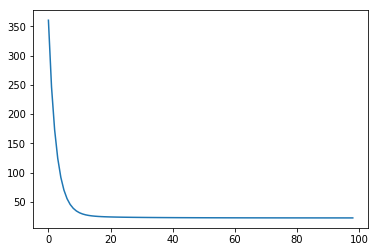

In [19]:
plt.plot(cost_history)
plt.show()

Finally, we will print our model's MSE on the testing set.

In [20]:
yhat = sess.run(linear_model, feed_dict={X: test_x})
mse = tf.reduce_mean(tf.square(yhat - test_y))
print("MSE: %f" % sess.run(mse)) 

MSE: 19.907943
